# NiSpace API test: integrated imaging data

In [1]:
import sys
import os
from glob import glob
import pathlib
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from nilearn.plotting import plot_roi, plot_stat_map, plot_anat, plot_surf_roi, plot_surf, view_img
from nilearn.datasets import fetch_surf_fsaverage

# current path
wd = pathlib.Path().resolve().parent
print(wd)

# sys.path.append(os.path.dirname(os.path.join(wd, "nispace")))
from nispace.datasets import _fetch_collection
from nispace.datasets import *

/Users/llotter/projects/nispace


/Users/llotter/opt/anaconda3/envs/nsp309/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


We have several templates, parcellations, and datasets integrated in NiSpace. These can be accessed through functions imported as `nispace.datasets.fetch_...()`. On first access, data should should be downloaded to the user's home directory into a folder called `nispace-data`. The user can however provide a custom data folder via the argument `nispace_data_dir` available for every `fetch_` method.

## Fetch MNI152 and fsaverage templates

We have two general templates with some of their specific maps implemented:
- `nispace.datasets.fetch_template("mni152")` will return a path to the MNI152NLin2009cAsym template with 1mm voxelsize (that's the one set to default in fMRIprep). Via the argument `desc`, one can obtain the T1 template (`"T1"`), a brainmask (`"mask"`), or the gray matter tissue probability map (`"gmprob"`). If `parcellation` is set to one of the parcellations introduces below and if `desc = "gmprob"`, average GM probability per parcel will be returned as a table.
- `nispace.datasets.fetch_template("fsaverage")` will return a path to the fsaverage5 template (10k resolution). Via the argument `desc`, one can obtain the pial template (`"pial"`), the inflated template (`"infl"`), or mean cortical thickness (`"thick"`). If `parcellation` is set to one of the parcellations introduces below and if `desc = "thick"`, average thickness per parcel will be returned as a table.

INFO | 10/06/24 14:22:35 | nispace: Loading MNI152NLin2009cAsym T1 template in 1mm resolution.
/Users/llotter/nispace-data/template/mni152/map/MNI152NLin2009cAsym_desc-T1_res-1mm.nii.gz
INFO | 10/06/24 14:22:35 | nispace: Loading MNI152NLin2009cAsym T1 template in 1mm resolution.


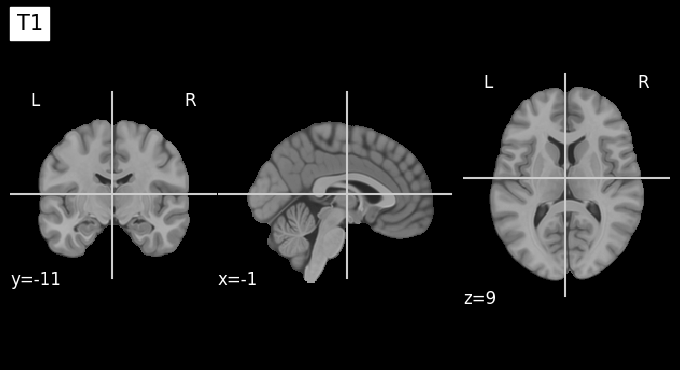

INFO | 10/06/24 14:22:37 | nispace: Loading MNI152NLin2009cAsym mask template in 1mm resolution.


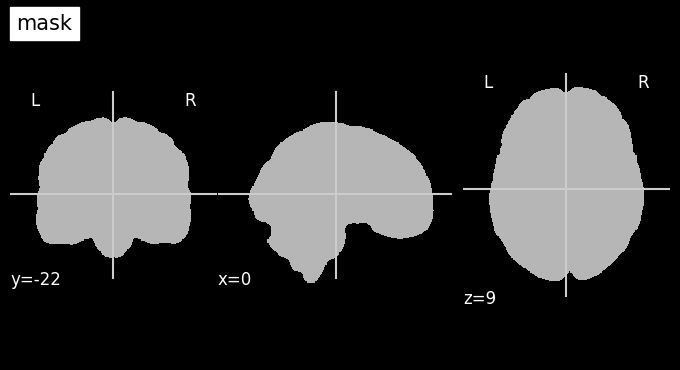

INFO | 10/06/24 14:22:37 | nispace: Loading MNI152NLin2009cAsym gmprob template in 1mm resolution.


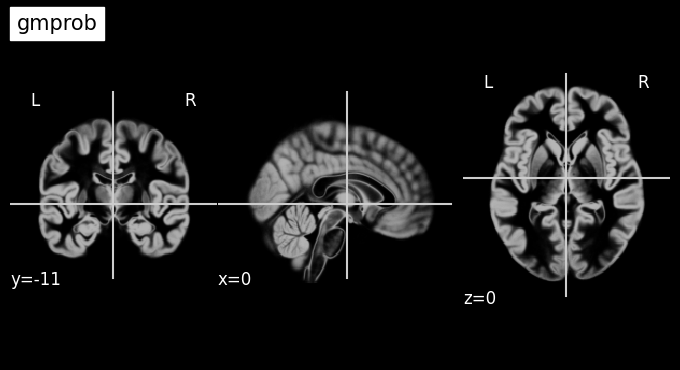

INFO | 10/06/24 14:22:38 | nispace: Loading MNI152NLin2009cAsym gmprob template in 1mm resolution.
INFO | 10/06/24 14:22:38 | nispace: Loading parcellated data: HCPex
(1, 426)


,1_LH_V1,2_LH_V2,3_LH_V3,4_LH_V4,5_LH_IPS1,6_LH_V3A,7_LH_V3B,8_LH_V6,9_LH_V6A,10_LH_V7,...,417_RH_NAc,418_RH_Gpe,419_RH_Gpi,420_RH_Amyg,421_RH_SNpc,422_RH_SNpr,423_RH_VTA,424_RH_MB,425_RH_Septum,426_RH_Nb
GM_prob,0.643093,0.675841,0.667812,0.637234,0.665956,0.612841,0.646885,0.673958,0.585385,0.617522,...,0.960104,0.217319,0.189999,0.947721,0.448548,0.381919,0.461321,0.69875,0.857557,0.644908


INFO | 10/06/24 14:22:38 | nispace: Loading FSaverage pial template in 10k resolution.
(PosixPath('/Users/llotter/nispace-data/template/fsaverage/map/fsaverage_desc-pial_hemi-L_res-10k.gii.gz'), PosixPath('/Users/llotter/nispace-data/template/fsaverage/map/fsaverage_desc-pial_hemi-R_res-10k.gii.gz'))
INFO | 10/06/24 14:22:38 | nispace: Loading FSaverage pial template in 10k resolution.


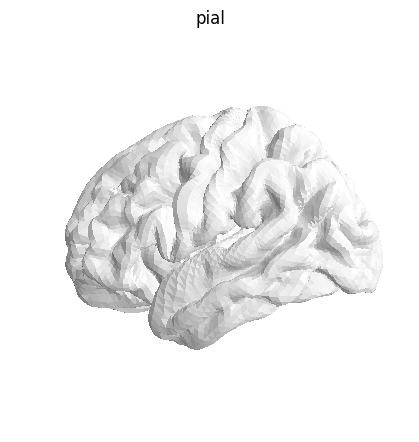

INFO | 10/06/24 14:22:39 | nispace: Loading FSaverage infl template in 10k resolution.


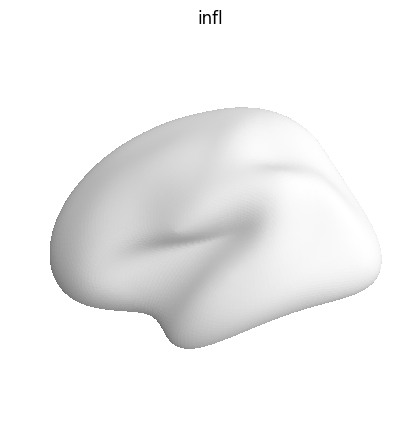

INFO | 10/06/24 14:22:40 | nispace: Loading FSaverage thick template in 10k resolution.
INFO | 10/06/24 14:22:40 | nispace: Loading FSaverage pial template in 10k resolution.


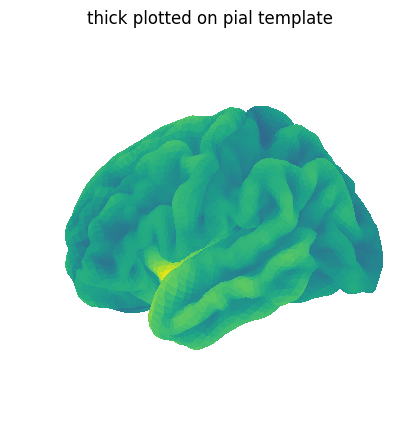

INFO | 10/06/24 14:22:41 | nispace: Loading FSaverage thick template in 10k resolution.
INFO | 10/06/24 14:22:41 | nispace: Loading parcellated data: Destrieux
(1, 148)


,1_LH_G_and_S_frontomargin,2_LH_G_and_S_occipital_inf,3_LH_G_and_S_paracentral,4_LH_G_and_S_subcentral,5_LH_G_and_S_transv_frontopol,6_LH_G_and_S_cingul-Ant,7_LH_G_and_S_cingul-Mid-Ant,8_LH_G_and_S_cingul-Mid-Post,9_LH_G_cingul-Post-dorsal,10_LH_G_cingul-Post-ventral,...,139_RH_S_parieto_occipital,140_RH_S_pericallosal,141_RH_S_postcentral,142_RH_S_precentral-inf-part,143_RH_S_precentral-sup-part,144_RH_S_suborbital,145_RH_S_subparietal,146_RH_S_temporal_inf,147_RH_S_temporal_sup,148_RH_S_temporal_transverse
thick,2.296334,2.32926,2.315184,2.57193,2.653908,2.549398,2.468044,2.428115,2.753652,2.694706,...,2.032558,2.095264,1.98269,2.306925,2.30365,2.054208,2.238073,2.228246,2.271225,2.320752


In [2]:
# MNI152, will by default return the T1 map
mni_map = fetch_template("mni152")
print(mni_map)

# all options
for desc in ["T1", "mask", "gmprob"]:
    mni_map = fetch_template("mni152", desc=desc)
    plot_anat(mni_map, title=desc)
    plt.show()

# get a table, will by default return the GM probability map
mni_tab = fetch_template("mni152", parcellation="HCPex")
print(mni_tab.shape)
display(mni_tab)

# fsaverage, will by default return the pial map
fsa_maps = fetch_template("fsaverage")
print(fsa_maps)

# all options
for desc in ["pial", "infl", "thick"]:
    fsa_maps = fetch_template("fsaverage", desc=desc)
    if desc in ["pial", "infl"]:
        plot_surf(fsa_maps[0], hemi="left", title=desc)
    else:
        plot_surf(fetch_template("fsaverage")[0], fsa_maps[0], hemi="left", title=f"{desc} plotted on pial template")
    plt.show()
    
# get a table, will by default return the GM probability map, only available for surface parcellations
fsa_tab = fetch_template("fsaverage", parcellation="Destrieux")
print(fsa_tab.shape)
display(fsa_tab)

## Fetch integrated parcellations

We have some volumetric and surface parcellations integrated. These can be loaded via `nispace.datasets.fetch_parcellation()`. 

The first argument should be a string with the parcellation's name. The other arguments, `space`, `n_parcels`, `resolution`, and `hemi` are used to find the matching parcellation. If no parcellation matching all criteria is found, an error message with relevant info will be returned.

If a parcellation was found, the function will return the path to the parcellation (hemispheres) and a list of labels

INFO | 10/06/24 14:25:39 | nispace: Loading parcellation: Schaefer200MelbourneS1 (n: 216, space: mni152, res: 1mm)
<class 'nibabel.nifti1.Nifti1Image'> MNI152
['1_RH_SC_HIP', '2_RH_SC_AMY', '3_RH_SC_pTHA', '4_RH_SC_aTHA', '5_RH_SC_NAc']
(216, 216)


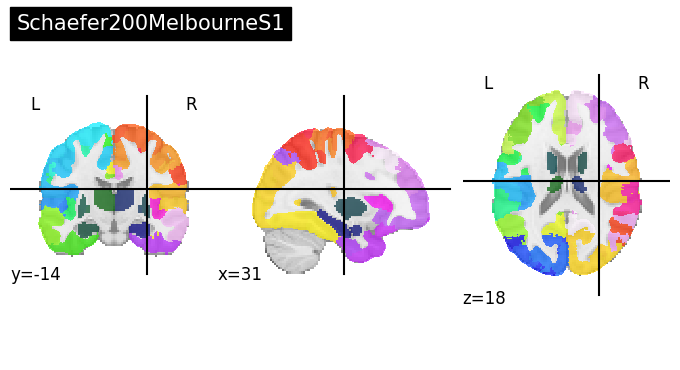

INFO | 10/06/24 14:25:40 | nispace: Loading parcellation: HCPex (n: 426, space: mni152, res: 1mm)
<class 'nibabel.nifti1.Nifti1Image'> MNI152
['1_LH_CX_V1', '2_LH_CX_V2', '3_LH_CX_V3', '4_LH_CX_V4', '5_LH_CX_IPS1']
(426, 426)


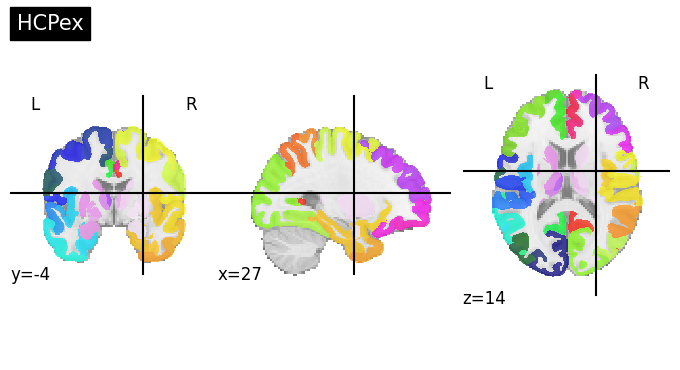

INFO | 10/06/24 14:25:41 | nispace: Loading parcellation: Destrieux (n: 148, space: fsaverage, res: 10k)
<class 'tuple'> fsaverage
['1_LH_CX_G_and_S_frontomargin', '2_LH_CX_G_and_S_occipital_inf', '3_LH_CX_G_and_S_paracentral', '4_LH_CX_G_and_S_subcentral', '5_LH_CX_G_and_S_transv_frontopol']


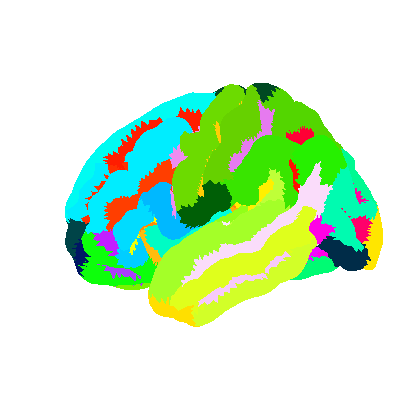

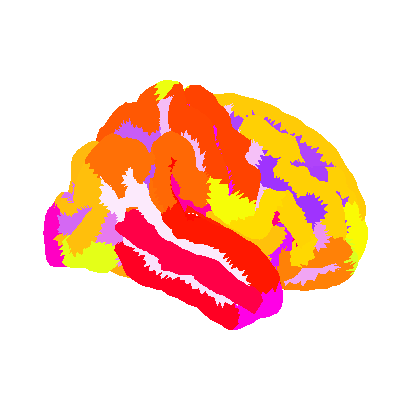

In [15]:
# available: Schaefer200MelbourneS1, HCPex, Destrieux

for parc_name in ["Schaefer200MelbourneS1", "HCPex", "Destrieux"]:
    parc, labels, space, dist_mat = fetch_parcellation(parc_name, return_space=True, return_dist_mat=True, return_loaded=True)
    print(type(parc), space)
    print(labels[:5])
    
    if parc_name != "Destrieux":
        print(dist_mat.shape)
        plot_roi(parc, title=parc_name)
        plt.show()
    else:
        plot_surf_roi(fetch_surf_fsaverage()["pial_left"], roi_map=parc[0].agg_data())
        plot_surf_roi(fetch_surf_fsaverage()["pial_right"], roi_map=parc[1].agg_data(), hemi="right")

### Cortex-only volumetric parcellation

When the argument `cortex_only` is True, volumetric parcellations are returned in a cortex-only version. Then, parcellations are not returned as a path but as a loaded nifti object (as subcortical parcels are dropped on-the-fly). Same is true for the distance matrix.

INFO | 10/06/24 14:25:51 | nispace: Loading parcellation: Schaefer200MelbourneS1 (n: 216, space: mni152, res: 1mm)
INFO | 10/06/24 14:25:51 | nispace: Removing 16 subcortical parcels. Will return Nifti1 object instead of path!
<class 'nibabel.nifti1.Nifti1Image'> MNI152
['17_LH_CX_Vis', '18_LH_CX_Vis', '19_LH_CX_Vis', '20_LH_CX_Vis', '21_LH_CX_Vis']
<class 'numpy.ndarray'> (200, 200)


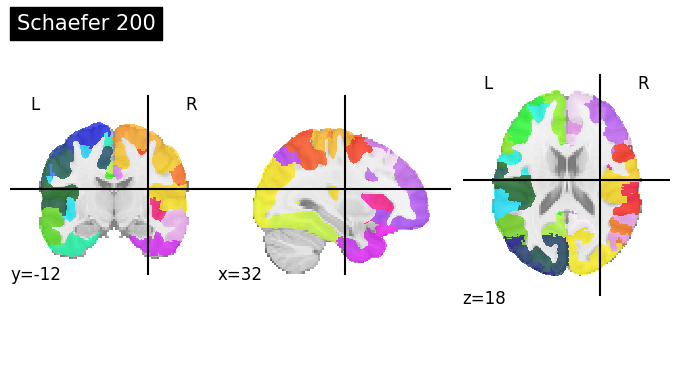

In [16]:
parc, labels, space, dist_mat = fetch_parcellation("Schaefer200MelbourneS1", cortex_only=True,
                                                   return_space=True, return_dist_mat=True)
print(type(parc), space)
print(labels[:5])
print(type(dist_mat), dist_mat.shape)
plot_roi(parc, title="Schaefer 200")

## Fetch integrated PET data

We have a large collection of PET atlases (imaging maps) included. These are stored in the same folder as above and can be accessed through a similar function: `nispace.datasets.fetch_reference("pet")`. 

The argument `dataset` has to be "pet". Included datasets currently encompass "pet", "mrna", and "brainmap"

The argument `maps` can be:
- a string matching a pet map
- a list with multiple of these strings,
- a dictionary with characteristics of these maps, keys: "target", "tracer", "n", "dx", "pub", items can be string or list

The argument `parcellation` can be one of the above parcellation names. If provided, a table with parcellated PET data will be returned instead of paths to the imaging maps

The argument `collection` can be a name of a pet map subset defined with the toolbox, currently: 
- "All": all maps
- "AllTargetSets": All maps, but sorted in sets by target. If called without a parcellation, this will not have an influence. If called with a parcellation, i.e. returned as a table, it will have a 3-dimensional "multi"-index, with "sets" in the first, "map" in the second, and "weight" (= number of subjects) in the third place.
- "UniqueTarget": one pre-selected map for each target 
- "UniqueTargetSets": one or more maps for each target, given they have the same tracer. If parcellation is provided, the output table is indexed as for "AllTargetSets".

INFO | 10/06/24 14:26:35 | nispace: Loading pet maps.

The NiSpace "PET" dataset is based on openly available nuclear imaging maps from various independent sources.
The accompanying metadata table contains detailed information about tracers, source samples, original publications and data 
sources, as well as the publication licenses. The licenses determine in which contexts the maps can be used. Every map, 
except for those with a "free" or "CC0 1.0" license, must be cited when used. The responsibility for this lies with the user!
We additionally recommend to cite Dukart et al., 2021 (https://doi.org/10.1002/hbm.25244) and Hansen et al., 2022 
(https://doi.org/10.1038/s41593-022-01186-3), as they provided the majority of these data.
- target-5HT1a_tracer-cumi101_n-8_dx-hc_pub-beliveau2017.nii.gz         Source: Beliveau2017       CC BY-NC-SA 4.0  https://doi.org/10.1523/JNEUROSCI.2830-16.2016
- target-5HT1a_tracer-way100635_n-35_dx-hc_pub-savli2012.nii.gz         Source: Savli2012     

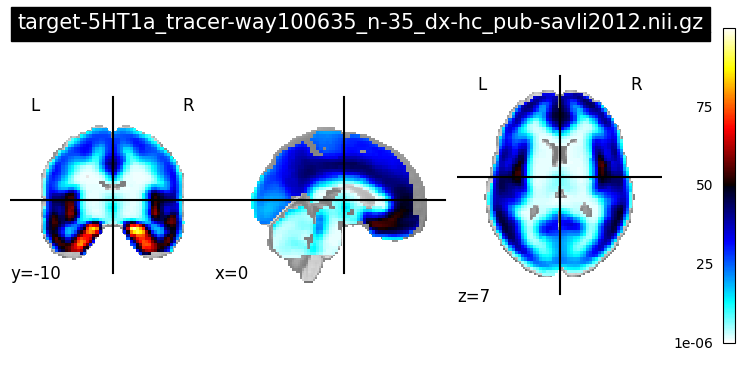

INFO | 10/06/24 14:26:36 | nispace: Loading pet maps.
INFO | 10/06/24 14:26:36 | nispace: Applying filter: target-NMDA_tracer-ge179_n-29_dx-hc_pub-galovic2021
INFO | 10/06/24 14:26:36 | nispace: Filtered from 46 to 1 maps.

The NiSpace "PET" dataset is based on openly available nuclear imaging maps from various independent sources.
The accompanying metadata table contains detailed information about tracers, source samples, original publications and data 
sources, as well as the publication licenses. The licenses determine in which contexts the maps can be used. Every map, 
except for those with a "free" or "CC0 1.0" license, must be cited when used. The responsibility for this lies with the user!
We additionally recommend to cite Dukart et al., 2021 (https://doi.org/10.1002/hbm.25244) and Hansen et al., 2022 
(https://doi.org/10.1038/s41593-022-01186-3), as they provided the majority of these data.
- target-NMDA_tracer-ge179_n-29_dx-hc_pub-galovic2021.nii.gz  Source: Galovic2021  CC BY

,1_LH_CX_G_and_S_frontomargin,2_LH_CX_G_and_S_occipital_inf,3_LH_CX_G_and_S_paracentral,4_LH_CX_G_and_S_subcentral,5_LH_CX_G_and_S_transv_frontopol,6_LH_CX_G_and_S_cingul-Ant,7_LH_CX_G_and_S_cingul-Mid-Ant,8_LH_CX_G_and_S_cingul-Mid-Post,9_LH_CX_G_cingul-Post-dorsal,10_LH_CX_G_cingul-Post-ventral,...,139_RH_CX_S_parieto_occipital,140_RH_CX_S_pericallosal,141_RH_CX_S_postcentral,142_RH_CX_S_precentral-inf-part,143_RH_CX_S_precentral-sup-part,144_RH_CX_S_suborbital,145_RH_CX_S_subparietal,146_RH_CX_S_temporal_inf,147_RH_CX_S_temporal_sup,148_RH_CX_S_temporal_transverse
map,,,,,,,,,,,,,,,,,,,,,
target-5HT1a_tracer-cumi101_n-8_dx-hc_pub-beliveau2017,0.152298,-0.867215,-0.910704,0.629737,0.593060,0.521233,0.041711,-0.385884,-1.157466,-0.874524,...,-0.630352,-1.789222,-1.015344,-0.159337,-0.714424,0.744234,-0.065963,0.004635,0.087736,0.440559
target-5HT1a_tracer-way100635_n-35_dx-hc_pub-savli2012,0.341783,-0.474821,-1.315982,0.266376,0.489235,0.489613,-0.160446,-0.340921,-0.059847,-1.528099,...,-1.090453,-1.868328,-0.609461,-0.511881,-0.758026,0.998004,-0.348006,1.391079,0.483772,0.225673


INFO | 10/06/24 14:26:36 | nispace: Loading pet maps.
INFO | 10/06/24 14:26:36 | nispace: Applying filter: {'target': ['5HT', 'GABA'], 'n': '>30'}
INFO | 10/06/24 14:26:36 | nispace: Filtered from 46 to 5 maps.
INFO | 10/06/24 14:26:36 | nispace: Loading parcellated data: Destrieux
INFO | 10/06/24 14:26:36 | nispace: Standardizing parcellated data.

The NiSpace "PET" dataset is based on openly available nuclear imaging maps from various independent sources.
The accompanying metadata table contains detailed information about tracers, source samples, original publications and data 
sources, as well as the publication licenses. The licenses determine in which contexts the maps can be used. Every map, 
except for those with a "free" or "CC0 1.0" license, must be cited when used. The responsibility for this lies with the user!
We additionally recommend to cite Dukart et al., 2021 (https://doi.org/10.1002/hbm.25244) and Hansen et al., 2022 
(https://doi.org/10.1038/s41593-022-01186-3), as th

(46, 148)

1_LH_CX_G_and_S_frontomargin  \
set   map                                                weight                                 
5HT1a target-5HT1a_tracer-cumi101_n-8_dx-hc_pub-beliv... 8                           0.152298   
      target-5HT1a_tracer-way100635_n-35_dx-hc_pub-sa... 35                          0.341783   

                                                                 2_LH_CX_G_and_S_occipital_inf  \
set   map                                                weight                                  
5HT1a target-5HT1a_tracer-cumi101_n-8_dx-hc_pub-beliv... 8                           -0.867215   
      target-5HT1a_tracer-way100635_n-35_dx-hc_pub-sa... 35                          -0.474821   

                                                                 3_LH_CX_G_and_S_paracentral  \
set   map                                                weight                                
5HT1a target-5HT1a_tracer-cumi101_n-8_dx-hc_pub-beliv... 8                         -0.910704   
      target-5HT1a_tracer-way100635_n-35_dx-hc_pub-sa... 35                        -1.315982   

                                                                 4_LH_CX_G_and_S_subcentral  \
set   map                                                weight                               
5HT1a target-5HT1a_tracer-cumi101_n-8_dx-hc_pub-beliv... 8                         0.629737   
      target-5HT1a_tracer-way100635_n-35_dx-hc_pub-sa... 35                        0.266376   

                                                                 5_LH_CX_G_and_S_transv_frontopol  \
set   map                                                weight                                     
5HT1a target-5HT1a_tracer-cumi101_n-8_dx-hc_pub-beliv... 8                               0.593060   
      target-5HT1a_tracer-way100635_n-35_dx-hc_pub-sa... 35                              0.489235   

                                                                 6_LH_CX_G_and_S_cingul-Ant  \
set   map                                                weight                               
5HT1a target-5HT1a_tracer-cumi101_n-8_dx-hc_pub-beliv... 8                         0.521233   
      target-5HT1a_tracer-way100635_n-35_dx-hc_pub-sa... 35                        0.489613   

                                                                 7_LH_CX_G_and_S_cingul-Mid-Ant  \
set   map                                                weight                                   
5HT1a target-5HT1a_tracer-cumi101_n-8_dx-hc_pub-beliv... 8                             0.041711   
      target-5HT1a_tracer-way100635_n-35_dx-hc_pub-sa... 35                           -0.160446   

                                                                 8_LH_CX_G_and_S_cingul-Mid-Post  \
set   map                                                weight                                    
5HT1a target-5HT1a_tracer-cumi101_n-8_dx-hc_pub-beliv... 8                             -0.385884   
      target-5HT1a_tracer-way100635_n-35_dx-hc_pub-sa... 35                            -0.340921   

                                                                 9_LH_CX_G_cingul-Post-dorsal  \
set   map                                                weight                                 
5HT1a target-5HT1a_tracer-cumi101_n-8_dx-hc_pub-beliv... 8                          -1.157466   
      target-5HT1a_tracer-way100635_n-35_dx-hc_pub-sa... 35                         -0.059847   

                                                                 10_LH_CX_G_cingul-Post-ventral  \
set   map                                                weight                                   
5HT1a target-5HT1a_tracer-cumi101_n-8_dx-hc_pub-beliv... 8                            -0.874524   
      target-5HT1a_tracer-way100635_n-35_dx-hc_pub-sa... 35                           -1.528099   

                                                                 ...  \
set   map                                                weight  ...   
5HT

INFO | 10/06/24 14:26:36 | nispace: Loading pet maps.
INFO | 10/06/24 14:26:36 | nispace: Applying collection filter from: /Users/llotter/nispace-data/reference/pet/collection-AllTargetSets.csv.
INFO | 10/06/24 14:26:36 | nispace: Loading parcellated data: Destrieux
INFO | 10/06/24 14:26:36 | nispace: Standardizing parcellated data.

The NiSpace "PET" dataset is based on openly available nuclear imaging maps from various independent sources.
The accompanying metadata table contains detailed information about tracers, source samples, original publications and data 
sources, as well as the publication licenses. The licenses determine in which contexts the maps can be used. Every map, 
except for those with a "free" or "CC0 1.0" license, must be cited when used. The responsibility for this lies with the user!
We additionally recommend to cite Dukart et al., 2021 (https://doi.org/10.1002/hbm.25244) and Hansen et al., 2022 
(https://doi.org/10.1038/s41593-022-01186-3), as they provided the 

In [18]:
lgr.setLevel("DEBUG")

# get all pet maps as paths to volumes
pet_maps = fetch_reference("pet")
print(len(pet_maps))
print(pet_maps[1])
plot_stat_map(pet_maps[1], title=pet_maps[1].name)
plt.show()

# load a single pet map
pet_maps = fetch_reference("pet", 
                           maps="target-NMDA_tracer-ge179_n-29_dx-hc_pub-galovic2021")
print(len(pet_maps))

# filter pet maps based on characteristics: target starting with 5HT or GABA
pet_maps = fetch_reference("pet", 
                           maps={"target": ["5HT", "GABA"]})
print(len(pet_maps))

# filter pet maps based on characteristics: target starting with 5HT or GABA and N subjects > 30
pet_maps = fetch_reference("pet", 
                           maps={"target": ["5HT", "GABA"], "n":">30"})
print(len(pet_maps))

# get all pet maps as table
pet_tab = fetch_reference("pet", 
                          parcellation="Destrieux")
print(pet_tab.shape) # 47 pet maps x 148 parcels
display(pet_tab.head(2))

# filter the table directly
pet_tab = fetch_reference("pet", 
                          maps={"target": ["5HT", "GABA"], "n":">30"}, 
                          parcellation="Destrieux")
print(pet_tab.shape) # 5 pet maps x 148 parcels

# use collection filter: All (no effect)
pet_maps = fetch_reference("pet", 
                           collection="All")
print(len(pet_maps))

# use collection filter: UniqueTargets (one map per target, pre-selected)
pet_maps = fetch_reference("pet", 
                           collection="UniqueTracer")
print(len(pet_maps))

# use collection filter: AllTargetSets (all maps but sorted in sets based on target)
# for maps, same output as no or "all" collection
pet_maps = fetch_reference("pet", 
                           collection="AllTargetSets")
print(len(pet_maps))
# when called with parcellation -> tabulated data -> multi-index
pet_tab = fetch_reference("pet", 
                          collection="AllTargetSets", 
                          parcellation="Destrieux")
display(pet_tab.shape, pet_tab.head(2))

# you can also pass a path to a collection file directly
pet_tab = fetch_reference("pet", 
                          collection="/Users/llotter/nispace-data/reference/pet/collection-AllTargetSets.csv", 
                          parcellation="Destrieux")
print(pet_tab.shape)

### Fetch metadata

We provide metadata for all included datasets, including their license. This is most relevant for the PET maps as most of them come from separate sources. The responsibility for citing the used data in accordance with the infromation provided by us is with the user.

In [20]:
# for all pet maps:
pet_metadata = fetch_metadata("pet")
print(pet_metadata.shape)
display(pet_metadata.head(2))

# subset, partial match is allowed
pet_metadata = fetch_metadata("pet", 
                               ["target-5HT1b_tracer-p943_n-23_dx-hc_pub-savli2012", 
                                "target-5HT2a_tracer-altanserin_n-19_dx-hc_pub-savli2012",
                                "GABA"])
print(pet_metadata.shape)
display(pet_metadata)

(46, 11)


,atlas,target,tracer,diagnosis,author,age_mean,age_sd,age_min,age_max,doi,license
0,target-5HT1a_tracer-cumi101_n-8_dx-hc_pub-beli...,5HT1a,cumi101,hc,beliveau2017,28.4,8.8,NaN,NaN,10.1523/JNEUROSCI.2830-16.2016,CC BY-NC-SA 4.0
1,target-5HT1a_tracer-way100635_n-35_dx-hc_pub-s...,5HT1a,way100635,hc,savli2012,26.3,5.2,21.0,47.0,10.1016/j.neuroimage.2012.07.001,CC BY-NC-SA 4.0


(5, 11)


,atlas,target,tracer,diagnosis,author,age_mean,age_sd,age_min,age_max,doi,license
3,target-5HT1b_tracer-p943_n-23_dx-hc_pub-savli2...,5HT1b,p943,hc,savli2012,28.7,7.0,18.0,44.0,10.1016/j.neuroimage.2012.07.001,CC BY-NC-SA 4.0
5,target-5HT2a_tracer-altanserin_n-19_dx-hc_pub-...,5HT2a,altanserin,hc,savli2012,28.2,5.7,21.0,40.0,10.1016/j.neuroimage.2012.07.001,CC BY-NC-SA 4.0
27,target-GABAa5_tracer-ro154513_n-10_dx-hc_pub-l...,GABAa5,ro154513,hc,lukow2022,25.4,3.2,22.0,30.0,10.1038/s42003-022-03268-1,CC BY 4.0
28,target-GABAa_tracer-flumazenil_n-16_dx-hc_pub-...,GABAa,flumazenil,hc,norgaard2020,26.6,8.0,19.0,46.0,10.1016/j.neuroimage.2021.117878,CC BY-NC-SA 4.0
29,target-GABAa_tracer-flumazenil_n-6_dx-hc_pub-d...,GABAa,flumazenil,hc,dukart2018,NaN,NaN,NaN,NaN,10.1038/s41598-018-22444-0,CC BY-NC-SA 4.0


## Fetch integrated mRNA data

We have Allen Brain Atlas mRNA gene expression data integrated. Here, we can only get the tables for integrated parcellations because the data is obtained via abagen directly for each parcellation parcel: `nispace.datasets.fetch_reference("mrna")`. 

Arguments are `maps`, a list of genes or None, `parcellation` and `collection` (see above). Using collections is mandatory for GCEAs. 

In [19]:
# Get all for a given parcellation
mrna_tab = fetch_reference("mrna", 
                           parcellation="Destrieux")
print(mrna_tab.shape) # number of genes x number of parcels
display(mrna_tab.shape, mrna_tab.head(2))

# Get collection, currently available: 
# cell types from Lake 2016 or Darmanis 2015; ENIGMA risk genes
mrna_tab = fetch_reference("mrna",
                           parcellation="Destrieux", 
                           collection="CellTypesPsychEncodeTPM")
print(mrna_tab.shape) # number of genes x number of parcels
display(mrna_tab.head(2))

# Get specific genes (test: 1 string, list of 2 strings, list of 3 strings with one gene not existing)
for genes in ["A1BG", "PVALB", ["PVALB", "SST"], ["PVALB", "SST", "BLABLABLA"]]:
    print("Selected genes:", genes)
    mrna_tab = fetch_reference("mrna",
                               maps=genes, 
                               parcellation="Destrieux")
    print(mrna_tab.shape) # number of genes x number of parcels
    display(mrna_tab)

INFO | 10/06/24 14:26:38 | nispace: Loading mrna maps.
INFO | 10/06/24 14:26:38 | nispace: Loading parcellated data: Destrieux
INFO | 10/06/24 14:26:38 | nispace: Standardizing parcellated data.

The NiSpace "mRNA" dataset is based on Allen Human Brain Atlas (AHBA) gene expression data published in Hawrylycz et al., 2015
(https://doi.org/10.1038/nn.4171). The AHBA dataset consists of mRNA expression data from postmortem brain tissue of 6 donors, 
mapped into imaging space using the abagen toolbox (Markello et al., 2021, https://doi.org/10.7554/eLife.72129).
In addition to those two publications, please cite publications associated with gene set collections as appropriate.


(15633, 148)


(15633, 148)

,1_LH_CX_G_and_S_frontomargin,2_LH_CX_G_and_S_occipital_inf,3_LH_CX_G_and_S_paracentral,4_LH_CX_G_and_S_subcentral,5_LH_CX_G_and_S_transv_frontopol,6_LH_CX_G_and_S_cingul-Ant,7_LH_CX_G_and_S_cingul-Mid-Ant,8_LH_CX_G_and_S_cingul-Mid-Post,9_LH_CX_G_cingul-Post-dorsal,10_LH_CX_G_cingul-Post-ventral,...,139_RH_CX_S_parieto_occipital,140_RH_CX_S_pericallosal,141_RH_CX_S_postcentral,142_RH_CX_S_precentral-inf-part,143_RH_CX_S_precentral-sup-part,144_RH_CX_S_suborbital,145_RH_CX_S_subparietal,146_RH_CX_S_temporal_inf,147_RH_CX_S_temporal_sup,148_RH_CX_S_temporal_transverse
map,,,,,,,,,,,,,,,,,,,,,
A1BG,0.915104,-0.833886,-1.429474,-0.229614,-1.264924,0.473820,0.114130,-0.352383,-1.400679,0.19700,...,-0.071765,0.191873,-1.627920,0.527742,-0.573100,0.683078,-0.146038,0.571981,0.518902,2.374083
A1BG-AS1,-0.276505,-0.468382,-1.085363,0.296107,-0.995114,0.617704,0.337769,0.109437,1.119759,-2.12928,...,-1.353809,-0.887764,-0.756467,-0.345989,-0.443215,0.872070,0.064986,0.780811,0.599911,0.623754


INFO | 10/06/24 14:26:39 | nispace: Loading mrna maps.
INFO | 10/06/24 14:26:39 | nispace: Applying collection filter from: /Users/llotter/nispace-data/reference/mrna/collection-CellTypesPsychEncodeTPM.json.
INFO | 10/06/24 14:26:40 | nispace: Loading parcellated data: Destrieux
INFO | 10/06/24 14:26:41 | nispace: Standardizing parcellated data.

The NiSpace "mRNA" dataset is based on Allen Human Brain Atlas (AHBA) gene expression data published in Hawrylycz et al., 2015
(https://doi.org/10.1038/nn.4171). The AHBA dataset consists of mRNA expression data from postmortem brain tissue of 6 donors, 
mapped into imaging space using the abagen toolbox (Markello et al., 2021, https://doi.org/10.7554/eLife.72129).
In addition to those two publications, please cite publications associated with gene set collections as appropriate.
- CellTypesPsychEncodeTPM  Source: Lake2016      https://doi.org/10.1126/science.aaf1204
- CellTypesPsychEncodeTPM  Source: Darmanis2015  https://doi.org/10.1073/pnas

1_LH_CX_G_and_S_frontomargin  \
set       map                                     
Adult-Ex1 CAMK2A                       0.371076   
          CCDC88C                     -1.475943   

                   2_LH_CX_G_and_S_occipital_inf  3_LH_CX_G_and_S_paracentral  \
set       map                                                                   
Adult-Ex1 CAMK2A                        0.949387                    -2.109972   
          CCDC88C                       0.868380                    -1.624082   

                   4_LH_CX_G_and_S_subcentral  \
set       map                                   
Adult-Ex1 CAMK2A                    -0.770702   
          CCDC88C                   -0.749639   

                   5_LH_CX_G_and_S_transv_frontopol  \
set       map                                         
Adult-Ex1 CAMK2A                           1.003433   
          CCDC88C                          0.406603   

                   6_LH_CX_G_and_S_cingul-Ant  7_LH_CX_G_and_S_cingul-Mid-Ant  \
set       map                                                                   
Adult-Ex1 CAMK2A                    -0.616401                       -1.311733   
          CCDC88C                   -0.679120                        0.091223   

                   8_LH_CX_G_and_S_cingul-Mid-Post  \
set       map                                        
Adult-Ex1 CAMK2A                         -1.326965   
          CCDC88C                        -0.047508   

                   9_LH_CX_G_cingul-Post-dorsal  \
set       map                                     
Adult-Ex1 CAMK2A                       1.095030   
          CCDC88C                     -0.899993   

                   10_LH_CX_G_cingul-Post-ventral  ...  \
set       map                                      ...   
Adult-Ex1 CAMK2A                        -0.600548  ...   
          CCDC88C                       -0.639085  ...   

                   139_RH_CX_S_parieto_occipital  140_RH_CX_S_pericallosal  \
set       map                                                                
Adult-Ex1 CAMK2A                       -0.695915                 -2.058511   
          CCDC88C                       1.190700                 -0.529589   

                   141_RH_CX_S_postcentral  142_RH_CX_S_precentral-inf-part  \
set       map                                                                 
Adult-Ex1 CAMK2A                  0.610503                         0.098620   
          CCDC88C                 0.769097                         0.511773   

                   143_RH_CX_S_precentral-sup-part  144_RH_CX_S_suborbital  \
set       map                                                                
Adult-Ex1 CAMK2A                         -0.251499               -0.078450   
          CCDC88C                        -0.526680               -0.546568   

                   145_RH_CX_S_subparietal  146_RH_CX_S_temporal_inf  \
set       map                                                          
Adult-Ex1 CAMK2A                 -0.432728                  0.344762   
          CCDC88C                 1.173901                  1.582906   

                   147_RH_CX_S_temporal_sup  148_RH_CX_S_temporal_transverse  
set       map                                                                 
Adult-Ex1 CAMK2A                   0.643324                        -0.405448  
          CCDC88C                  1.854082                        -1.263962  

[2 rows x 148 columns]

Selected genes: A1BG
INFO | 10/06/24 14:26:41 | nispace: Loading mrna maps.
INFO | 10/06/24 14:26:41 | nispace: Applying filter: A1BG
INFO | 10/06/24 14:26:41 | nispace: Filtered from 15633 to 1 maps.
INFO | 10/06/24 14:26:41 | nispace: Loading parcellated data: Destrieux
INFO | 10/06/24 14:26:41 | nispace: Standardizing parcellated data.

The NiSpace "mRNA" dataset is based on Allen Human Brain Atlas (AHBA) gene expression data published in Hawrylycz et al., 2015
(https://doi.org/10.1038/nn.4171). The AHBA dataset consists of mRNA expression data from postmortem brain tissue of 6 donors, 
mapped into imaging space using the abagen toolbox (Markello et al., 2021, https://doi.org/10.7554/eLife.72129).
In addition to those two publications, please cite publications associated with gene set collections as appropriate.


(1, 148)


,1_LH_CX_G_and_S_frontomargin,2_LH_CX_G_and_S_occipital_inf,3_LH_CX_G_and_S_paracentral,4_LH_CX_G_and_S_subcentral,5_LH_CX_G_and_S_transv_frontopol,6_LH_CX_G_and_S_cingul-Ant,7_LH_CX_G_and_S_cingul-Mid-Ant,8_LH_CX_G_and_S_cingul-Mid-Post,9_LH_CX_G_cingul-Post-dorsal,10_LH_CX_G_cingul-Post-ventral,...,139_RH_CX_S_parieto_occipital,140_RH_CX_S_pericallosal,141_RH_CX_S_postcentral,142_RH_CX_S_precentral-inf-part,143_RH_CX_S_precentral-sup-part,144_RH_CX_S_suborbital,145_RH_CX_S_subparietal,146_RH_CX_S_temporal_inf,147_RH_CX_S_temporal_sup,148_RH_CX_S_temporal_transverse
map,,,,,,,,,,,,,,,,,,,,,
A1BG,0.915104,-0.833886,-1.429474,-0.229614,-1.264924,0.47382,0.11413,-0.352383,-1.400679,0.197,...,-0.071765,0.191873,-1.62792,0.527742,-0.5731,0.683078,-0.146038,0.571981,0.518902,2.374083


Selected genes: PVALB
INFO | 10/06/24 14:26:41 | nispace: Loading mrna maps.
INFO | 10/06/24 14:26:41 | nispace: Applying filter: PVALB
INFO | 10/06/24 14:26:41 | nispace: Filtered from 15633 to 1 maps.
INFO | 10/06/24 14:26:41 | nispace: Loading parcellated data: Destrieux
INFO | 10/06/24 14:26:41 | nispace: Standardizing parcellated data.

The NiSpace "mRNA" dataset is based on Allen Human Brain Atlas (AHBA) gene expression data published in Hawrylycz et al., 2015
(https://doi.org/10.1038/nn.4171). The AHBA dataset consists of mRNA expression data from postmortem brain tissue of 6 donors, 
mapped into imaging space using the abagen toolbox (Markello et al., 2021, https://doi.org/10.7554/eLife.72129).
In addition to those two publications, please cite publications associated with gene set collections as appropriate.


(1, 148)


,1_LH_CX_G_and_S_frontomargin,2_LH_CX_G_and_S_occipital_inf,3_LH_CX_G_and_S_paracentral,4_LH_CX_G_and_S_subcentral,5_LH_CX_G_and_S_transv_frontopol,6_LH_CX_G_and_S_cingul-Ant,7_LH_CX_G_and_S_cingul-Mid-Ant,8_LH_CX_G_and_S_cingul-Mid-Post,9_LH_CX_G_cingul-Post-dorsal,10_LH_CX_G_cingul-Post-ventral,...,139_RH_CX_S_parieto_occipital,140_RH_CX_S_pericallosal,141_RH_CX_S_postcentral,142_RH_CX_S_precentral-inf-part,143_RH_CX_S_precentral-sup-part,144_RH_CX_S_suborbital,145_RH_CX_S_subparietal,146_RH_CX_S_temporal_inf,147_RH_CX_S_temporal_sup,148_RH_CX_S_temporal_transverse
map,,,,,,,,,,,,,,,,,,,,,
PVALB,-0.068725,1.021571,1.073707,0.805103,0.179165,-1.189399,-0.903269,-0.283652,0.182368,-1.289793,...,0.386742,-1.234514,0.79531,0.911033,0.832734,-1.126877,0.137649,-1.028979,-0.030577,1.393685


Selected genes: ['PVALB', 'SST']
INFO | 10/06/24 14:26:41 | nispace: Loading mrna maps.
INFO | 10/06/24 14:26:41 | nispace: Applying filter: ['PVALB', 'SST']
INFO | 10/06/24 14:26:41 | nispace: Filtered from 15633 to 2 maps.
INFO | 10/06/24 14:26:41 | nispace: Loading parcellated data: Destrieux
INFO | 10/06/24 14:26:42 | nispace: Standardizing parcellated data.

The NiSpace "mRNA" dataset is based on Allen Human Brain Atlas (AHBA) gene expression data published in Hawrylycz et al., 2015
(https://doi.org/10.1038/nn.4171). The AHBA dataset consists of mRNA expression data from postmortem brain tissue of 6 donors, 
mapped into imaging space using the abagen toolbox (Markello et al., 2021, https://doi.org/10.7554/eLife.72129).
In addition to those two publications, please cite publications associated with gene set collections as appropriate.


(2, 148)


,1_LH_CX_G_and_S_frontomargin,2_LH_CX_G_and_S_occipital_inf,3_LH_CX_G_and_S_paracentral,4_LH_CX_G_and_S_subcentral,5_LH_CX_G_and_S_transv_frontopol,6_LH_CX_G_and_S_cingul-Ant,7_LH_CX_G_and_S_cingul-Mid-Ant,8_LH_CX_G_and_S_cingul-Mid-Post,9_LH_CX_G_cingul-Post-dorsal,10_LH_CX_G_cingul-Post-ventral,...,139_RH_CX_S_parieto_occipital,140_RH_CX_S_pericallosal,141_RH_CX_S_postcentral,142_RH_CX_S_precentral-inf-part,143_RH_CX_S_precentral-sup-part,144_RH_CX_S_suborbital,145_RH_CX_S_subparietal,146_RH_CX_S_temporal_inf,147_RH_CX_S_temporal_sup,148_RH_CX_S_temporal_transverse
map,,,,,,,,,,,,,,,,,,,,,
PVALB,-0.068725,1.021571,1.073707,0.805103,0.179165,-1.189399,-0.903269,-0.283652,0.182368,-1.289793,...,0.386742,-1.234514,0.795310,0.911033,0.832734,-1.126877,0.137649,-1.028979,-0.030577,1.393685
SST,0.683840,-1.458293,-0.978896,0.310641,0.274004,1.628296,1.071825,0.534449,-0.330558,-1.368330,...,-1.409432,0.952846,-0.511133,0.260649,-0.677239,1.737836,-0.085830,-0.063747,-0.370810,0.411003


Selected genes: ['PVALB', 'SST', 'BLABLABLA']
INFO | 10/06/24 14:26:42 | nispace: Loading mrna maps.
INFO | 10/06/24 14:26:42 | nispace: Applying filter: ['PVALB', 'SST', 'BLABLABLA']
INFO | 10/06/24 14:26:42 | nispace: Filtered from 15633 to 2 maps.
INFO | 10/06/24 14:26:42 | nispace: Loading parcellated data: Destrieux
INFO | 10/06/24 14:26:42 | nispace: Standardizing parcellated data.

The NiSpace "mRNA" dataset is based on Allen Human Brain Atlas (AHBA) gene expression data published in Hawrylycz et al., 2015
(https://doi.org/10.1038/nn.4171). The AHBA dataset consists of mRNA expression data from postmortem brain tissue of 6 donors, 
mapped into imaging space using the abagen toolbox (Markello et al., 2021, https://doi.org/10.7554/eLife.72129).
In addition to those two publications, please cite publications associated with gene set collections as appropriate.


(2, 148)


,1_LH_CX_G_and_S_frontomargin,2_LH_CX_G_and_S_occipital_inf,3_LH_CX_G_and_S_paracentral,4_LH_CX_G_and_S_subcentral,5_LH_CX_G_and_S_transv_frontopol,6_LH_CX_G_and_S_cingul-Ant,7_LH_CX_G_and_S_cingul-Mid-Ant,8_LH_CX_G_and_S_cingul-Mid-Post,9_LH_CX_G_cingul-Post-dorsal,10_LH_CX_G_cingul-Post-ventral,...,139_RH_CX_S_parieto_occipital,140_RH_CX_S_pericallosal,141_RH_CX_S_postcentral,142_RH_CX_S_precentral-inf-part,143_RH_CX_S_precentral-sup-part,144_RH_CX_S_suborbital,145_RH_CX_S_subparietal,146_RH_CX_S_temporal_inf,147_RH_CX_S_temporal_sup,148_RH_CX_S_temporal_transverse
map,,,,,,,,,,,,,,,,,,,,,
PVALB,-0.068725,1.021571,1.073707,0.805103,0.179165,-1.189399,-0.903269,-0.283652,0.182368,-1.289793,...,0.386742,-1.234514,0.795310,0.911033,0.832734,-1.126877,0.137649,-1.028979,-0.030577,1.393685
SST,0.683840,-1.458293,-0.978896,0.310641,0.274004,1.628296,1.071825,0.534449,-0.330558,-1.368330,...,-1.409432,0.952846,-0.511133,0.260649,-0.677239,1.737836,-0.085830,-0.063747,-0.370810,0.411003


## Fetch integrated BrainMap data

We have a collection of meta-analytic maps by BrainMap task domain. The argument `dataset` has to be "brainmap". Handling is as shown above for the PET maps. The data can be loaded as volumes or parcellated, including null maps. There is one collection, sorting the data by overarching domain (e.g., "Action", "Emotion")

INFO | 10/06/24 14:27:02 | nispace: Loading brainmap maps.

The NiSpace "BrainMap" dataset is consists of meta-analytic maps generated from coordinates from the BrainMap database
(http://brainmap.org). Please cite the following references when using these maps.
- Fox2002        https://doi.org/10.1038/nrn789
- Fox2005        https://doi.org/10.1002/hbm.20141
- Lancaster2007  https://doi.org/10.1002/hbm.20345
- Wager2007      https://doi.org/10.1093/scan/nsm015
- Eickhoff2009   https://doi.org/10.1002/hbm.20718


41
/Users/llotter/nispace-data/reference/brainmap/map/domain-Action.Execution.Speech_n-34.nii.gz


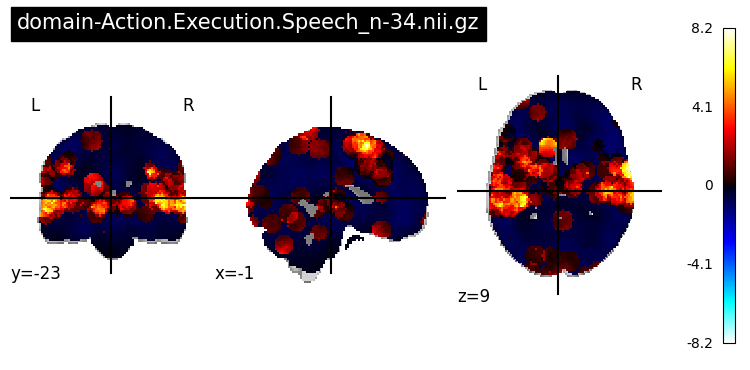

INFO | 10/06/24 14:27:03 | nispace: Loading brainmap maps.
INFO | 10/06/24 14:27:03 | nispace: Applying filter: Action.Execution.Speech
INFO | 10/06/24 14:27:03 | nispace: Filtered from 41 to 1 maps.

The NiSpace "BrainMap" dataset is consists of meta-analytic maps generated from coordinates from the BrainMap database
(http://brainmap.org). Please cite the following references when using these maps.
- Fox2002        https://doi.org/10.1038/nrn789
- Fox2005        https://doi.org/10.1002/hbm.20141
- Lancaster2007  https://doi.org/10.1002/hbm.20345
- Wager2007      https://doi.org/10.1093/scan/nsm015
- Eickhoff2009   https://doi.org/10.1002/hbm.20718


1 [PosixPath('/Users/llotter/nispace-data/reference/brainmap/map/domain-Action.Execution.Speech_n-34.nii.gz')]
INFO | 10/06/24 14:27:03 | nispace: Loading brainmap maps.
INFO | 10/06/24 14:27:03 | nispace: Applying filter: {'domain': ['Action', 'Attention']}
INFO | 10/06/24 14:27:03 | nispace: Filtered from 41 to 5 maps.

The NiSpace "Brai

,1_LH_CX_G_and_S_frontomargin,2_LH_CX_G_and_S_occipital_inf,3_LH_CX_G_and_S_paracentral,4_LH_CX_G_and_S_subcentral,5_LH_CX_G_and_S_transv_frontopol,6_LH_CX_G_and_S_cingul-Ant,7_LH_CX_G_and_S_cingul-Mid-Ant,8_LH_CX_G_and_S_cingul-Mid-Post,9_LH_CX_G_cingul-Post-dorsal,10_LH_CX_G_cingul-Post-ventral,...,139_RH_CX_S_parieto_occipital,140_RH_CX_S_pericallosal,141_RH_CX_S_postcentral,142_RH_CX_S_precentral-inf-part,143_RH_CX_S_precentral-sup-part,144_RH_CX_S_suborbital,145_RH_CX_S_subparietal,146_RH_CX_S_temporal_inf,147_RH_CX_S_temporal_sup,148_RH_CX_S_temporal_transverse
map,,,,,,,,,,,,,,,,,,,,,
domain-Action.Execution.Speech_n-34,-0.220011,1.193932,0.039487,1.874095,-0.414787,-0.726366,0.170146,-0.784988,-0.908966,-0.301062,...,-0.446793,-0.490069,-0.292008,-0.389361,-0.901610,-1.003666,-0.824288,-0.407925,0.070161,3.591948
domain-Action.Execution_n-237,0.361134,-0.129217,1.135320,2.334560,-0.504702,-1.312060,0.957050,1.444462,-0.961472,-0.105709,...,-0.730419,-0.804216,1.022042,-0.133945,1.531696,-1.768669,-0.461315,-0.161151,-0.295728,0.203481


INFO | 10/06/24 14:27:03 | nispace: Loading brainmap maps.
INFO | 10/06/24 14:27:03 | nispace: Applying collection filter from: /Users/llotter/nispace-data/reference/brainmap/collection-AllDomainSets.json.
INFO | 10/06/24 14:27:03 | nispace: Loading parcellated data: HCPex
INFO | 10/06/24 14:27:03 | nispace: Standardizing parcellated data.

The NiSpace "BrainMap" dataset is consists of meta-analytic maps generated from coordinates from the BrainMap database
(http://brainmap.org). Please cite the following references when using these maps.
- Fox2002        https://doi.org/10.1038/nrn789
- Fox2005        https://doi.org/10.1002/hbm.20141
- Lancaster2007  https://doi.org/10.1002/hbm.20345
- Wager2007      https://doi.org/10.1093/scan/nsm015
- Eickhoff2009   https://doi.org/10.1002/hbm.20718




1_LH_CX_V1  \
set           map                                                           
Action        domain-Action.Observation_n-27                    -0.461121   
              domain-Action.Imagination_n-33                    -0.483936   
              domain-Action.Execution_n-237                      0.069729   
              domain-Action.Execution.Speech_n-34               -0.190046   
              domain-Action.Inhibition_n-80                     -0.517410   
Perception    domain-Perception.Vision_n-291                     1.225743   
              domain-Perception.Vision.Color_n-30                1.078132   
              domain-Perception.Vision.Motion_n-72               0.878879   
              domain-Perception.Vision.Shape_n-76                0.407647   
              domain-Perception.Audition_n-106                  -0.489683   
              domain-Perception.Olfaction_n-29                   0.230768   
              domain-Perception.Gustation_n-31                   0.538148   
              domain-Perception.Somesthesis_n-158               -0.701438   
              domain-Perception.Somesthesis.Pain_n-82           -0.691848   
Interoception domain-Interoception.RespirationRegulation_n-20   -0.654319   
              domain-Interoception.Sexuality_n-40               -0.541784   
Emotion       domain-Emotion.Positive_n-239                      0.251224   
              domain-Emotion.Positive.Happiness_n-36            -0.360869   
              domain-Emotion.Positive.RewardGain_n-155           0.423951   
              domain-Emotion.Negative_n-178                      0.321656   
              domain-Emotion.Negative.Anger_n-16                -0.120504   
              domain-Emotion.Negative.Anxiety_n-26               0.701399   
              domain-Emotion.Negative.Disgust_n-25               0.928362   
              domain-Emotion.Negative.Fear_n-42                  0.555692   
              domain-Emotion.Negative.Sadness_n-25               0.118757   
              domain-Emotion.Valence_n-23                        0.993709   
Cognition     domain-Cognition.Attention_n-402                  -0.415150   
              domain-Cognition.Spatial_n-40                     -0.359974   
              domain-Cognition.Temporal_n-20                    -0.509902   
              domain-Cognition.Reasoning_n-216                   0.275845   
              domain-Cognition.SocialCognition_n-105            -0.318386   
              domain-Cognition.Memory_n-307                      0.022749   
              domain-Cognition.Memory.Explicit_n-143             0.932123   
              domain-Cognition.Memory.Working_n-150             -0.638470   
              domain-Cognition.Music_n-76                        0.084879   
              domain-Cognition.Language_n-339                    0.084155   
              domain-Cognition.Language.Orthography_n-34        -0.376059   
              domain-Cognition.Language.Phonology_n-44          -0.490425   
              domain-Cognition.Language.Semantics_n-195          0.432467   
              domain-Cognition.Language.Speech_n-128             0.067542   
              domain-Cognition.Language.Syntax_n-28              0.216430   

                                                               2_LH_CX_V2  \
set           map                                                           
Action        domain-Action.Observation_n-27                    -0.077276   
              domain-Action.Imagination_n-33                    -0.234794   
              domain-Action.Execution_n-237                     -0.196336   
              domain-Action.Execution.Speech_n-34               -0.197496   
              domain-Action.Inhibition_n-80                      0.119461   
Perception    domain-Perception.Vision_n-291                     1.144247   
              domain-Perception.Vision.Color_n-30                0.235576   
              domain-Perception.Vision.Motion_n-72        

In [22]:
lgr.setLevel("DEBUG")

# get all pet maps as paths to volumes
brainmap_maps = fetch_reference("brainmap")
print(len(brainmap_maps))
print(brainmap_maps[0])
plot_stat_map(brainmap_maps[0], title=brainmap_maps[0].name)
plt.show()

# load a single pet map
brainmap_maps = fetch_reference("brainmap", 
                                maps="Action.Execution.Speech")
print(len(brainmap_maps), brainmap_maps)

# filter pet maps based on characteristics: domain in Action or Attention
brainmap_maps = fetch_reference("brainmap", 
                                maps={"domain": ["Action", "Attention"]})
print(len(brainmap_maps), brainmap_maps)

# get all maps as table
brainmap_tab = fetch_reference("brainmap", 
                               parcellation="Destrieux")
print(brainmap_tab.shape) # 47 pet maps x 148 parcels
display(brainmap_tab.head(2))

# use collection filter: AllDomainSets 
brainmap_tab = fetch_reference("brainmap", 
                               collection="AllDomainSets",
                               parcellation="HCPex")
display(brainmap_tab)

## Fetch example datasets

We include a few example datasets for evaluation and exploration purposes. Available:
- `happy`: n = 100 fake subjects in two groups. The first 50 are "happy" subjects (sub-001H - sub-050H), generated from neuroquery maps for terms with positive emotional valence. The second half are "neutral"/control subjects, each generated from a mixture of 200 random neuroquery maps and therefore basically noise with a bit of "default brain" in them. For analyses, they can be treated as two independent groups or two scans of the same subject. 

In [23]:
fetch_example("happy")

INFO | 10/06/24 14:27:05 | nispace: Loading example dataset: happy
INFO | 10/06/24 14:27:05 | nispace: The happy dataset was parcellated using the Schaefer200MelbourneS1 parcellation.


,1_RH_SC_HIP,2_RH_SC_AMY,3_RH_SC_pTHA,4_RH_SC_aTHA,5_RH_SC_NAc,6_RH_SC_GP,7_RH_SC_PUT,8_RH_SC_CAU,9_LH_SC_HIP,10_LH_SC_AMY,...,207_RH_CX_Default,208_RH_CX_Default,209_RH_CX_Default,210_RH_CX_Default,211_RH_CX_Default,212_RH_CX_Default,213_RH_CX_Default,214_RH_CX_Default,215_RH_CX_Default,216_RH_CX_Default
sub-001H,-1.169317,0.659730,-0.252428,0.255775,3.063407,0.842101,2.105580,0.379213,-1.107364,0.763812,...,1.632188,1.680253,-0.108135,0.835279,0.374343,1.212071,0.516214,-1.110187,0.507818,0.624656
sub-002H,-1.029378,0.392960,-0.582311,-0.260871,2.333218,0.771998,1.764294,0.076125,-1.002971,0.496378,...,1.362518,1.368511,-0.195958,0.699824,0.302250,1.018583,0.404959,-0.928149,0.488933,0.612408
sub-003H,-0.672798,0.300029,-0.608585,-0.421008,1.652008,0.863853,1.381140,-0.103050,-0.670375,0.380154,...,1.079933,1.071393,-0.133740,0.580090,0.218293,0.761107,0.272294,-0.792569,0.310759,0.448372
sub-004H,-0.951254,0.718369,-0.455249,-0.038087,2.804853,1.107959,2.041347,0.161057,-0.909267,0.831812,...,1.579725,1.626022,-0.072021,0.810506,0.306932,1.091319,0.407535,-1.140142,0.398552,0.560564
sub-005H,-0.632732,0.570631,-0.599694,-0.343751,2.078618,1.213394,1.676500,-0.086425,-0.622002,0.666470,...,1.309854,1.330070,-0.049182,0.698252,0.225770,0.850557,0.275478,-1.009911,0.252231,0.435433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-096C,0.062443,0.054017,0.048332,0.331079,2.245735,1.037991,2.879278,1.815245,0.208774,0.483184,...,0.548666,0.747896,0.030059,0.126153,0.290495,0.837300,0.166215,0.265442,0.825484,1.373665
sub-097C,-0.184872,0.452184,-0.480565,-0.099787,2.511869,0.282082,1.531284,0.691960,0.130779,-0.164204,...,1.657876,1.395157,-0.080305,0.816164,0.560924,1.463523,0.253139,0.527463,0.891046,1.161086
sub-098C,-0.330930,0.552325,1.460466,0.976580,3.439946,1.933392,4.023277,1.659652,0.392845,0.550884,...,0.683829,0.714077,0.658109,0.272485,-0.146143,0.502927,-0.015514,-0.139492,0.677724,0.432374
sub-099C,0.384674,0.639101,1.457312,1.389717,3.219844,1.260396,3.121682,1.431943,0.662222,0.118652,...,0.860606,1.036281,-0.464630,0.949118,-0.205431,0.535841,0.726862,0.480434,0.744688,0.868950
